In [17]:
import numpy as np
import pandas as pd
from numpy.random import *
import pymc3 as pm
from scipy.stats import uniform
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import scipy

In [2]:
def generate(p, size):
    return binomial(1, p=p, size=size) #1d
    
print(generate(0.4, 20))

[0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0]


In [7]:
data = pd.DataFrame(data=[4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4], columns=['y'])
data['N'] = np.ones(20, dtype=np.int) * 8

data

,y,N
0,4,8
1,3,8
2,4,8
3,5,8
4,5,8
5,2,8
6,3,8
7,1,8
8,4,8
9,0,8


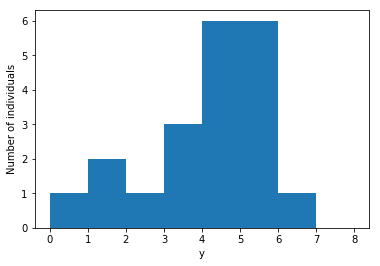

In [11]:
plt.hist(data['y'], bins=range(9))
plt.xlabel('y')
plt.ylabel('Number of individuals')
plt.show()

In [24]:
def loglikelihood(d, q):
    return np.sum(np.log(scipy.special.comb(d['N'], d['y'])) + d['y'] * math.log(q) + (d['N'] - d['y'])*math.log(1 - q))
    
L = loglikelihood(data, 0.3)
print(L)

-46.378306065840476


In [69]:
def random_normal(epochs, pi=0, sigma=0.01):
    return np.random.normal(pi, sigma, epochs)
    

# メトロポリス法：確率的山登り法
def metropolis(data, start, epochs):
    q_cur = start
    ll_cur = loglikelihood(data, q_cur)
    q = [q_cur]
    ll = [ll_cur]
    for e, r in zip(random_normal(epochs, sigma=0.7), np.random.random(epochs)):
        q_new = q_cur + e
        q_new = min(max(0.0001, q_new), 0.9999)
        ll_new = loglikelihood(data, q_new)
        if ll_new > ll_cur or math.exp(ll_new - ll_cur) > r:
            q_cur = q_new
            ll_cur = ll_new
        q.append(q_cur)
        ll.append(ll_cur)
    return q, ll
    

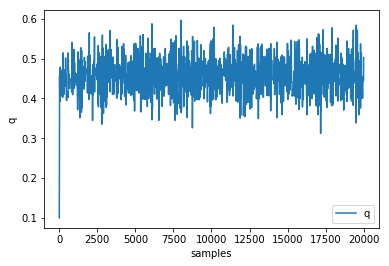

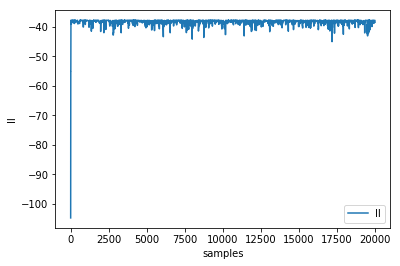

In [75]:
q_sample, ll_sample = metropolis(data, 0.1, 20000)
plt.plot(np.arange(len(q_sample)), q_sample, label='q')
plt.legend()
plt.xlabel('samples')
plt.ylabel('q')
plt.show()
plt.plot(np.arange(len(ll_sample)), ll_sample, label='ll')
plt.legend()
plt.xlabel('samples')
plt.ylabel('ll')
plt.show()

(41,) (41,)


<Container object of 41 artists>

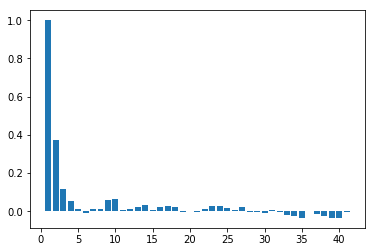

In [86]:
# correlogram
cor = sm.tsa.stattools.acf(q_sample)
x = np.arange(1, len(cor) + 1)
print(cor.shape, x.shape)
plt.bar(x, cor)

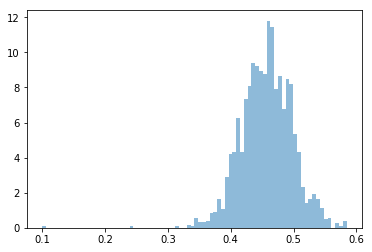

In [78]:
plt.hist(q_sample, bins=80, histtype="stepfilled", normed=True, alpha=0.5)
plt.show()